In [1]:
# Essential imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
data = pd.read_csv("Production Data Cleaned.csv")

In [3]:
# Previewing the first five rows of the dataset
data.head()

,DATE,NUMBER OF DRUM(QTY),RATE,AMOUNT,EXPENSES ANALYSIS,PRODUCTION COST,RETURNS
0,02/01/2023,6 DRUMS,20000,120000,LABOUR PAYMENT FOR PRODUCTION,67450.0,52550.0
1,02/01/2023,1 DRUM MCFDS,10000,10000,NaN,NaN,10000.0
2,01/03/2023,6 DRUMS,23000,138000,LABOUR PAYMENT FOR PRODUCTION,51200.0,86800.0
3,02/03/2023,6 DRUMS,20000,120000,LABOUR PAYMENT FOR PRODUCTION,63450.0,56550.0
4,08/03/2023,5 GALLONS,19000,95000,LABOUR PAYMENT FOR PRODUCTION,64140.0,30860.0


In [4]:
# Previewing the last five rows of the dataset
data.tail()

,DATE,NUMBER OF DRUM(QTY),RATE,AMOUNT,EXPENSES ANALYSIS,PRODUCTION COST,RETURNS
42,29/03/2023,7 GALLONS,17000,119000,LABOUR PAYMENT FOR PRODUCTION,64800.0,54200.0
43,29/06/2023,7 GALLONS,16000,112000,LABOUR PAYMENT FOR PRODUCTION,111000.0,1000.0
44,30/03/2023,6 GALLONS,17000,102000,LABOUR PAYMENT FOR PRODUCTION,48550.0,53450.0
45,30/05/2023,5 GALLONS,17000,85000,LABOUR PAYMENT FOR PRODUCTION,59900.0,25100.0
46,30/08/2023,6 GALLONS,20000,120000,LABOUR PAYMENT FOR PRODUCTION,72900.0,47100.0


In [5]:
# Getting a general summary information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 47 non-null     object 
 1   NUMBER OF DRUM(QTY)  47 non-null     object 
 2   RATE                 47 non-null     int64  
 3   AMOUNT               47 non-null     int64  
 4   EXPENSES ANALYSIS    44 non-null     object 
 5   PRODUCTION COST      44 non-null     float64
 6   RETURNS              46 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.7+ KB


### From the above, it can be seen that the data has 47 entries or rows between 0 - 46 as well as 7 columns between 0 -6.
### We need to convert the 'RETURNS' and 'PRODUCTION COST' columns respectively into `int64` objects respectively. 

## Data Cleaning
1. Since the missing rows from the 'PRODUCTION COST' row are just three (3), we can just drop them off or replace with the mean values of the column. It depends on what we are working with but for this particular project, I will replace the missing data with the mean values of the column.
2. I will convert the 'RETURNS' and 'PRODUCTION COST' variables from a python object into an 'int64' object.

In [6]:
# Replacing with mean
mean_PC = data['PRODUCTION COST'].mean()
data['PRODUCTION COST'].fillna(mean_PC, inplace=True)

In [7]:
# Confirm if the items are now 47
data['PRODUCTION COST'].count()

47

In [8]:
# Viewing the 'RETURNS' column
data['RETURNS']

0     52550.0
1     10000.0
2     86800.0
3     56550.0
4     30860.0
5     54400.0
6     54500.0
7     31650.0
8     67000.0
9     35500.0
10    40400.0
11        NaN
12    40000.0
13    67225.0
14    73100.0
15    67930.0
16    10000.0
17    29100.0
18    10000.0
19    50000.0
20    55650.0
21    50700.0
22    56000.0
23    79000.0
24    47470.0
25    46450.0
26    36950.0
27    70000.0
28    -5000.0
29    59700.0
30    70250.0
31    62300.0
32   -15000.0
33    43600.0
34    48230.0
35    69400.0
36    57300.0
37    83450.0
38    47500.0
39    59300.0
40     3400.0
41    86990.0
42    54200.0
43     1000.0
44    53450.0
45    25100.0
46    47100.0
Name: RETURNS, dtype: float64

In [11]:
# Replacing the missing value with the mean of the column
mean_R = data['RETURNS'].mean()
data['RETURNS'].fillna(mean_R, inplace=True)

In [12]:
# Converting the column to 'RETURNS' from object to numeric(int64)
data['RETURNS'] = data['RETURNS'].astype('int64')

In [14]:
# Confirm if changes took place
data['RETURNS'].dtype

dtype('int64')

## Data Visualization

In [15]:
data['PRODUCTION COST'].mean()

65339.659090909096

In [16]:
data['RETURNS'].mean()

47001.1914893617

In [17]:
data['AMOUNT'].mean()

107170.21276595745

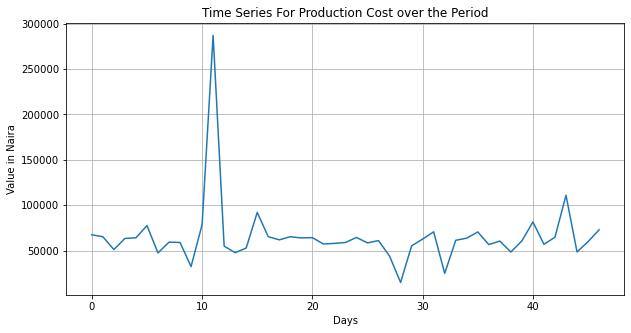

In [20]:
# Plotting the cost of production over the peeriod in consideration
plt.figure(figsize=(10, 5))
plt.plot(data['PRODUCTION COST'])
plt.title('Time Series For Production Cost over the Period')
plt.xlabel('Days')
plt.ylabel('Value in Naira')
plt.grid(True)

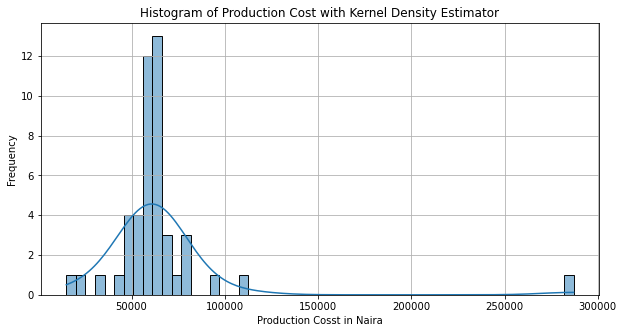

In [23]:
# Crataing a histogram for the Production Cost
plt.figure(figsize=(10, 5))
sns.histplot(data['PRODUCTION COST'], kde=True)
plt.title('Histogram of Production Cost with Kernel Density Estimator')
plt.xlabel('Production Cosst in Naira')
plt.ylabel('Frequency')
plt.grid(True)

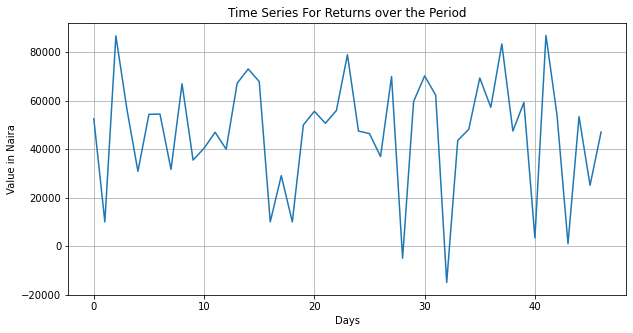

In [24]:
# Plotting the returns over the period in consideration
plt.figure(figsize=(10, 5))
plt.plot(data['RETURNS'])
plt.title('Time Series For Returns over the Period')
plt.xlabel('Days')
plt.ylabel('Value in Naira')
plt.grid(True)

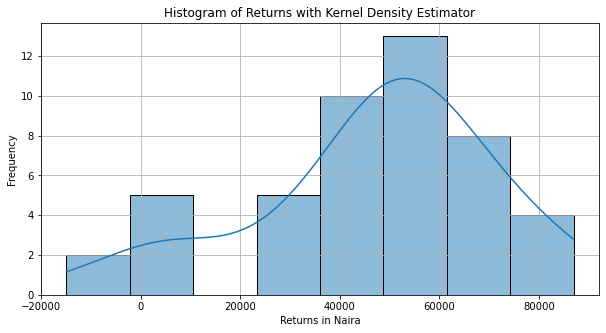

In [25]:
# Crataing a histogram for the Production Cost
plt.figure(figsize=(10, 5))
sns.histplot(data['RETURNS'], kde=True)
plt.title('Histogram of Returns with Kernel Density Estimator')
plt.xlabel('Returns in Naira')
plt.ylabel('Frequency')
plt.grid(True)

<AxesSubplot:xlabel='PRODUCTION COST', ylabel='RETURNS'>

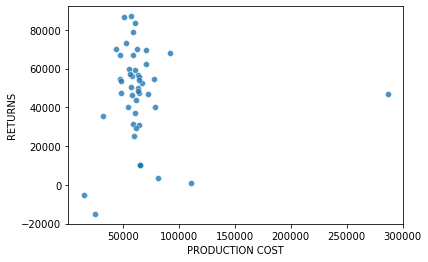

In [35]:
sns.scatterplot(x=data['PRODUCTION COST'], y=data['RETURNS'], alpha=0.8)

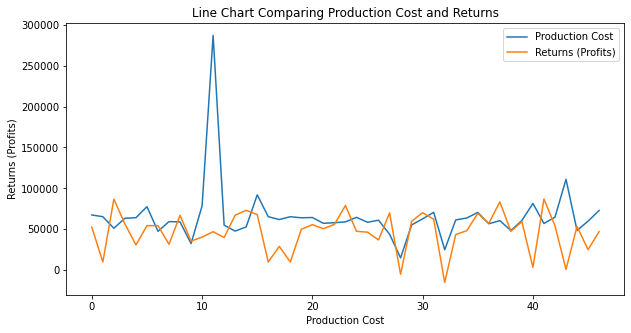

In [39]:
# Comparative Plots
days = [i for i in range(47)]

# Create line chart
plt.figure(figsize=(10, 5))
plt.plot(days, data['PRODUCTION COST'], label='Production Cost')
plt.plot(days, data['RETURNS'], label='Returns (Profits)')
plt.xlabel('Production Cost')
plt.ylabel('Returns (Profits)')
plt.title('Line Chart Comparing Production Cost and Returns')
plt.legend()
plt.show()
